# DATASET - **1**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/Data-cleaning-for-beginners-using-pandas.csv")

In [ ]:
copy_data = data.copy()

In [ ]:
data

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1
5,5,44.0,$77k-$89k,1.4,"India,In",1999,TRUE
6,6,21.0,$44k-$99k,0.0,"New York,Ny",-1,-1
7,7,44.0,$44k-$99k,-1.0,Australia Aus,-1,-1
8,8,35.0,$44k-$99k,5.4,"New York,Ny",-1,-1
9,9,22.0,$44k-$99k,7.7,"India,In",-1,TRUE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        29 non-null     int64  
 1   Age          22 non-null     float64
 2   Salary       29 non-null     object 
 3   Rating       28 non-null     float64
 4   Location     29 non-null     object 
 5   Established  29 non-null     int64  
 6   Easy Apply   29 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ KB


In [ ]:
data.isnull().sum()

Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

In [ ]:
data.columns

Index(['Index', 'Age', 'Salary', 'Rating', 'Location', 'Established',
       'Easy Apply'],
      dtype='object')

# Cleaning the data

In [ ]:
sample = data.columns.str.lower().str.replace(" ","_")

In [ ]:
text = '$40k-$100k'
text.replace('$',"")

'40k-100k'

In [ ]:
sample

Index(['index', 'age', 'salary', 'rating', 'location', 'established',
       'easy_apply'],
      dtype='object')

# Handling the missing values

In [ ]:
avg_age = data['Age'].mean()
avg_age

39.03448275862069

In [ ]:
#Take mean as an input for missing values
data['Age'] = data.Age.fillna(avg_age)
data['Age'] = data.Age.round(decimals=1)

# Rating Range

In [ ]:
avg_Rating=data['Rating'].mean()
avg_Rating

4.1482758620689655

In [ ]:
#Take mean as an input for missing values
data['Rating'] = data.Rating.fillna(avg_Rating)
data['Rating'] = data.Rating.round(decimals=1)
data['Rating'] = data.Rating.replace(-1.0,avg_Rating)

# Established Column

In [ ]:
data['Established'] = data.Established.replace(-1, "Unknown")

In [ ]:
data.head(10)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000- 99000,5.4,India,1999,TRUE
1,1,66.0,55000- 66000,3.5,New York,2002,TRUE
2,2,39.0,77000- 89000,3.5,New York,Unknown,FALSE
3,3,64.0,44000- 99000,4.4,India In,1988,FALSE
4,4,25.0,44000- 99000,6.4,Australia Aus,2002,FALSE
5,5,44.0,77000- 89000,1.4,India,1999,TRUE
6,6,21.0,44000- 99000,0.0,New York,Unknown,FALSE
7,7,44.0,44000- 99000,3.5,Australia Aus,Unknown,FALSE
8,8,35.0,44000- 99000,5.4,New York,Unknown,FALSE
9,9,22.0,44000- 99000,7.7,India,Unknown,TRUE


In [ ]:
#datatypes of each indicators
data.dtypes

Index            int64
Age            float64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object

# Salary Formatting

In [ ]:
data['Salary']=data['Salary'].str.replace('$',' ').str.replace("k","000")

<ipython-input-66-945906c08b9e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Salary']=data['Salary'].str.replace('$',' ').str.replace("k","000")


In [ ]:
data.head(5)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000- 99000,5.4,India,1999,TRUE
1,1,66.0,55000- 66000,3.5,New York,2002,TRUE
2,2,39.0,77000- 89000,3.5,New York,Unknown,FALSE
3,3,64.0,44000- 99000,4.4,India In,1988,FALSE
4,4,25.0,44000- 99000,6.4,Australia Aus,2002,FALSE


# Outliers

In [ ]:
#identifying potential outliers in numerical indicator
data.describe()[['Age','Rating']]

,Age,Rating
count,29.000000,29.000000
mean,39.034483,4.148276
std,13.973145,2.090219
min,13.000000,0.000000
25%,32.000000,3.400000
50%,39.000000,4.000000
75%,44.000000,5.400000
max,66.000000,7.800000


Index        Axes(0.125,0.786098;0.352273x0.0939024)
Age       Axes(0.547727,0.786098;0.352273x0.0939024)
Rating       Axes(0.125,0.673415;0.352273x0.0939024)
dtype: object

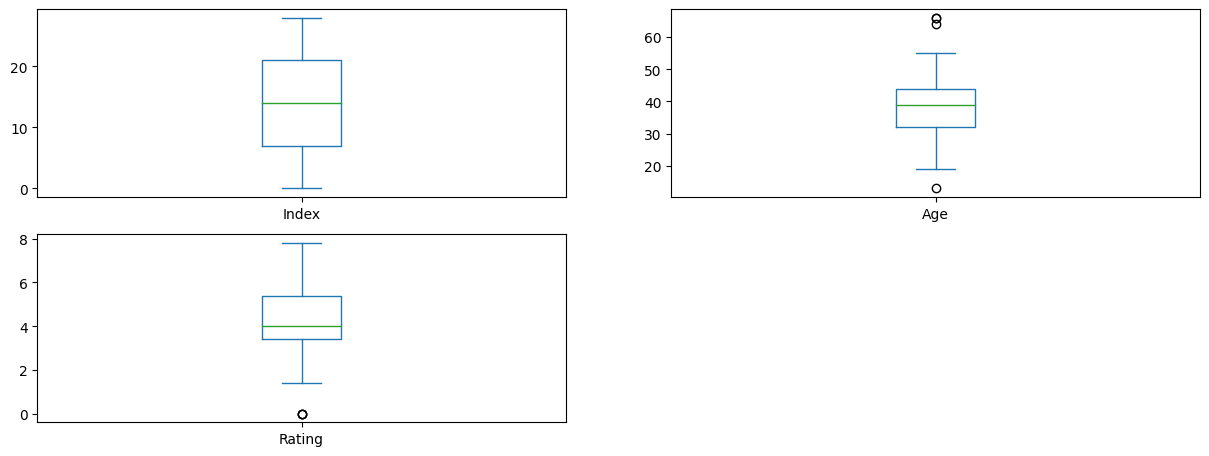

In [ ]:
# Outliers can be identified with various visualization like histogram, boxplot. To do that we have to import one specific library called matplotlib
import matplotlib.pyplot as plt
data.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

# Location Accuracy

In [ ]:
 data['Location']=data['Location'].str.split(",",expand=True)[0]

In [ ]:
data.head(5)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000- 99000,5.4,India,1999,TRUE
1,1,66.0,55000- 66000,3.5,New York,2002,TRUE
2,2,39.0,77000- 89000,3.5,New York,Unknown,FALSE
3,3,64.0,44000- 99000,4.4,India In,1988,FALSE
4,4,25.0,44000- 99000,6.4,Australia Aus,2002,FALSE


In [ ]:
data['Easy Apply']=data['Easy Apply'].str.replace('-1','FALSE')

In [ ]:
data.head(10)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000- 99000,5.4,India,1999,TRUE
1,1,66.0,55000- 66000,3.5,New York,2002,TRUE
2,2,39.0,77000- 89000,3.5,New York,Unknown,FALSE
3,3,64.0,44000- 99000,4.4,India In,1988,FALSE
4,4,25.0,44000- 99000,6.4,Australia Aus,2002,FALSE
5,5,44.0,77000- 89000,1.4,India,1999,TRUE
6,6,21.0,44000- 99000,0.0,New York,Unknown,FALSE
7,7,44.0,44000- 99000,3.5,Australia Aus,Unknown,FALSE
8,8,35.0,44000- 99000,5.4,New York,Unknown,FALSE
9,9,22.0,44000- 99000,7.7,India,Unknown,TRUE


Age Distribution

In [ ]:
data["Age"].unique()

array([44., 66., 39., 64., 25., 21., 35., 22., 55., 19., 32., 13., 52.])

In [ ]:
# filling NaN/null values by mean value of ages.
data["Age"] = data['Age'].fillna(data['Age'].mean()).round(decimals = 0)

In [ ]:
# Changing the data type of age column as int
data["Age"] = data["Age"].astype(int)

In [ ]:
data.head(5)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44,44000- 99000,5.4,India,1999,TRUE
1,1,66,55000- 66000,3.5,New York,2002,TRUE
2,2,39,77000- 89000,3.5,New York,Unknown,FALSE
3,3,64,44000- 99000,4.4,India In,1988,FALSE
4,4,25,44000- 99000,6.4,Australia Aus,2002,FALSE


# Handling Categorical Data:

In [ ]:
# Converting Salary into categorical variable
bins = [0, 50000, 70000, np.inf]
labels = ['low', 'medium', 'high']

data["Salary"] = pd.cut(data["Salary"].str.split('-').str[0].astype(int), bins, labels=labels)

In [ ]:
data.head(5)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44,low,5.4,India,1999,TRUE
1,1,66,medium,3.5,New York,2002,TRUE
2,2,39,high,3.5,New York,Unknown,FALSE
3,3,64,low,4.4,India In,1988,FALSE
4,4,25,low,6.4,Australia Aus,2002,FALSE


# Data Integrity

In [ ]:
# Once the data is cleaned, exporting the cleaned data so that we can check its data integrity
data.to_csv('Dataset-2-cleaned_data.csv')

In [ ]:
# Loading the cleaned data into pandas dataframe
data_uncleaned = pd.read_csv("/content/Data-cleaning-for-beginners-using-pandas.csv")
data_cleaned = pd.read_csv("Dataset-2-cleaned_data.csv")

In [ ]:
#df_uncleaned.head()
print(data_cleaned.head(5))
print(data_uncleaned.head(5))

   Unnamed: 0  Index  Age  Salary  Rating       Location Established  \
0           0      0   44     low     5.4          India        1999   
1           1      1   66  medium     3.5       New York        2002   
2           2      2   39    high     3.5       New York     Unknown   
3           3      3   64     low     4.4       India In        1988   
4           4      4   25     low     6.4  Australia Aus        2002   

   Easy Apply  
0        True  
1        True  
2       False  
3       False  
4       False  
   Index   Age     Salary  Rating       Location  Established Easy Apply
0      0  44.0  $44k-$99k     5.4       India,In         1999       TRUE
1      1  66.0  $55k-$66k     3.5    New York,Ny         2002       TRUE
2      2   NaN  $77k-$89k    -1.0    New York,Ny           -1         -1
3      3  64.0  $44k-$99k     4.4       India In         1988         -1
4      4  25.0  $44k-$99k     6.4  Australia Aus         2002         -1


In [ ]:
# Summarize the statistics of the Data
print("Summary of uncleaned data:")
print(data_uncleaned.describe())
print()

print("Summary of cleaned data:")
print(data_cleaned.describe())
print()

Summary of uncleaned data:
           Index        Age     Rating  Established
count  29.000000  22.000000  28.000000    29.000000
mean   14.000000  39.045455   3.528571  1638.620690
std     8.514693  16.134781   2.825133   762.079599
min     0.000000  13.000000  -1.000000    -1.000000
25%     7.000000  25.000000   1.050000  1935.000000
50%    14.000000  39.500000   4.200000  1984.000000
75%    21.000000  50.000000   5.400000  1999.000000
max    28.000000  66.000000   7.800000  2020.000000

Summary of cleaned data:
       Unnamed: 0      Index        Age     Rating
count   29.000000  29.000000  29.000000  29.000000
mean    14.000000  14.000000  39.034483   4.148276
std      8.514693   8.514693  13.973145   2.090219
min      0.000000   0.000000  13.000000   0.000000
25%      7.000000   7.000000  32.000000   3.400000
50%     14.000000  14.000000  39.000000   4.000000
75%     21.000000  21.000000  44.000000   5.400000
max     28.000000  28.000000  66.000000   7.800000



In [ ]:
# Check for any missing or duplicated values in the Data
print("Missing values in uncleaned data:")
print(data_uncleaned.isnull().sum())
print()

print("Missing values in cleaned data:")
print(data_cleaned.isnull().sum())
print()

print("Duplicated values in uncleaned data:")
print(data_uncleaned.duplicated().sum())
print()

print("Duplicated values in cleaned data:")
print(data_cleaned.duplicated().sum())
print()

Missing values in uncleaned data:
Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

Missing values in cleaned data:
Unnamed: 0     0
Index          0
Age            0
Salary         0
Rating         0
Location       0
Established    0
Easy Apply     0
dtype: int64

Duplicated values in uncleaned data:
0

Duplicated values in cleaned data:
0



In [ ]:
# displaying cleaned data Finally.
data_cleaned

,Unnamed: 0,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,0,44,low,5.4,India,1999,True
1,1,1,66,medium,3.5,New York,2002,True
2,2,2,39,high,3.5,New York,Unknown,False
3,3,3,64,low,4.4,India In,1988,False
4,4,4,25,low,6.4,Australia Aus,2002,False
5,5,5,44,high,1.4,India,1999,True
6,6,6,21,low,0.0,New York,Unknown,False
7,7,7,44,low,3.5,Australia Aus,Unknown,False
8,8,8,35,low,5.4,New York,Unknown,False
9,9,9,22,low,7.7,India,Unknown,True
